# CEE 690-02

# Environmental Spatial Data Analysis

# Lecture 9

# Logistics

* Homework pressure is starting to be lifted as of today...
* HW#5 will be posted this Thursday evening
* HW#5 is not due until Thursday of next week
* I have updated the syllabus
* Initial proposal is due on 10/10 via email to Nate
* **Important**: All final project discussions/questions should go to me. Reza's role is primarily to help with homeworks and the general course material.

# Map projections!

# (I hope you are excited!)

# Let's start off with some motivation

# Data to use: GMTED2010

Griddded global elevation dataset at a 30 arcsec spatial resolution. There are better and finer resolution elevation data out there but we will use GMTED2010 for now as an example. I have upscaled the dataset to 0.1 arcdegree spatial resolution for this presentation.

<img src="https://prd-wret.s3-us-west-2.amazonaws.com/assets/palladium/production/s3fs-public/styles/side_image/public/thumbnails/image/gmted2010.PNG" width="400">


Let's plot the data on the lat/lon grid

In [5]:
import rasterio
import numpy as np
file = '/data/GMTED2010/mn450.tif'
fp = rasterio.open(file,'r')
dem = fp.read(1)
#Set no data to sea level
dem[dem == fp.nodata] = 0.0

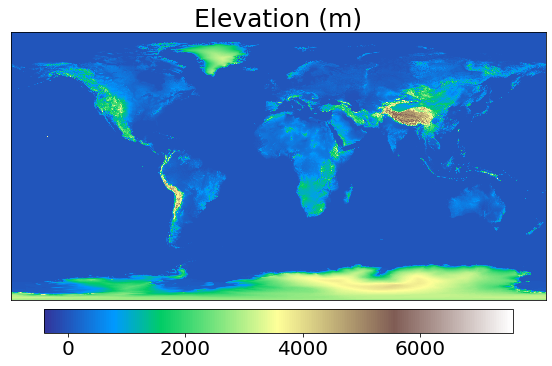

In [6]:
#Let's plot the data
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.imshow(dem,cmap=plt.get_cmap('terrain'))
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(orientation='horizontal',shrink=0.6,pad=0.03)
cb.ax.tick_params(labelsize=20)
plt.title('Elevation (m)',fontsize=25)
plt.show()

Pretty map but nothing new...

Let's now introduce cartopy

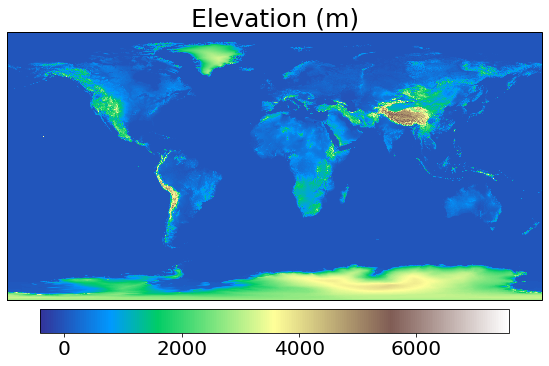

In [7]:
import cartopy
img_extent = (-180,180,-90,90)
fig = plt.figure(figsize=(14,6))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
plt.imshow(dem,transform=cartopy.crs.PlateCarree(),cmap=plt.get_cmap('terrain'),extent=(img_extent))
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(ax=ax,orientation='horizontal',shrink=0.6,pad=0.03)
cb.ax.tick_params(labelsize=20)
plt.title('Elevation (m)',fontsize=25)
plt.show()

That is the exact same plot... Are we making any progress?

More than it might seem at first. Hello map projections!

In [ ]:
%%HTML
<iframe width="939" height="528" src="https://scitools.org.uk/cartopy/docs/latest/crs/projections.html" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe> 

Let's try out the Robinson projection

In [ ]:
img_extent = (-180,180,-90,90)
fig = plt.figure(figsize=(14,6))
#Target projection
ax = plt.axes(projection=cartopy.crs.Robinson())
#Source projection
plt.imshow(dem,transform=cartopy.crs.PlateCarree(),cmap=plt.get_cmap('terrain'),extent=(img_extent))
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(ax=ax,orientation='horizontal',shrink=0.6,pad=0.03)
cb.ax.tick_params(labelsize=20)
plt.title('Elevation (m)',fontsize=25)
plt.show()

Progress!

Things get fun quickly.

In [ ]:
img_extent = (-180,180,-90,90)
fig = plt.figure(figsize=(14,6))
#Target projection
ax = plt.axes(projection=cartopy.crs.Robinson())
#Let's mask out sea level elevation
dem = np.ma.masked_array(dem,dem==0)
#Source projection
plt.imshow(dem,transform=cartopy.crs.PlateCarree(),cmap=plt.get_cmap('terrain'),extent=(img_extent))
plt.xticks([])
plt.yticks([])
#Let's add country borders, coastlines, major riverrs, and lakes
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
#Let's make the ocean's gray
ax.add_feature(cartopy.feature.OCEAN,color='gray',alpha=0.2)
#Let's add a colorbar
cb = plt.colorbar(ax=ax,orientation='horizontal',shrink=0.6,pad=0.03)
cb.ax.tick_params(labelsize=20)
plt.title('Elevation (m)',fontsize=25)
plt.show()

How about a globe?

In [ ]:
img_extent = (-180,180,-90,90)
fig = plt.figure(figsize=(10,10))
#Target projection
ax = plt.axes(projection=cartopy.crs.Orthographic())
#Source projection
im = plt.imshow(dem,transform=cartopy.crs.PlateCarree(),cmap=plt.get_cmap('terrain'),extent=(img_extent))
plt.xticks([])
plt.yticks([])
#Let's add country borders, coastlines, major riverrs, and lakes
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
#Let's make the ocean's gray
ax.add_feature(cartopy.feature.OCEAN,color='gray',alpha=0.2)
cb = plt.colorbar(ax=ax,orientation='horizontal',shrink=0.6,pad=0.03)
cb.ax.tick_params(labelsize=20)
plt.title('Elevation (m)',fontsize=25)
plt.show()

How about a rotating globe? 

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

img_extent = (-180,180,-90,90)
fig = plt.figure(figsize=(10,10))
vmin = np.min(dem)
vmax = np.max(dem)
nframes = 5

# animation function. This is called sequentially
def animate(i):
    #Clear figure
    plt.clf()
    #Target projection
    ax = plt.axes(projection=cartopy.crs.Orthographic(central_longitude=np.linspace(-180,180,nframes)[i]))
    #Source projection
    im = plt.imshow(dem,vmin=vmin,vmax=vmax,
                    transform=cartopy.crs.PlateCarree(),
                    cmap=plt.get_cmap('terrain'),extent=(img_extent))
    plt.xticks([])
    plt.yticks([])
    #Let's add country borders, coastlines, major riverrs, and lakes
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
    ax.add_feature(cartopy.feature.RIVERS)
    #Add the colorbar
    cb = plt.colorbar(ax=ax,orientation='horizontal',shrink=0.6,pad=0.03)
    cb.ax.tick_params(labelsize=20)
    cb.ax.set_xlabel('Elevation (m)',fontsize=25)
    return (im,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,frames=nframes, interval=500, blit=True)

HTML(anim.to_html5_video())

Explore Cartopy, it is amazing. But for now, we need to learn about what is happening under the hood. We need to learn about map projections.

# Basic Geodesy

Source: Robinson et al., 1995

# Spherical vs Ellipsoid Earth I


* The Earth is an oblate ellipsoid
* Earth's centrifugal force leads to slight bulging
* The polar flattening is given by $f = (a-b)/a$
* Modern satellites show that $f \approx 1/298$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/WGS84_mean_Earth_radius.svg/1280px-WGS84_mean_Earth_radius.svg.png" width="400">

Where $b$ is the Polar axis and $a$ is the Equatorial axis.

# Historical Earth Ellipsoids

In [ ]:
%%html
<iframe width="939" height="528" src="https://en.wikipedia.org/wiki/Earth_ellipsoid#Historical_Earth_ellipsoids" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe> 

The WGS-84 ellipsoid remains the go-to ellipsoid to this day. 

# Geographic Coordinates 




<img src="https://upload.wikimedia.org/wikipedia/commons/8/83/Latitude_and_longitude_graticule_on_a_sphere.svg" width="400">

Where $\phi$ is latitude and $\lambda$ is longitude

# Parallels and Meridians

<img src="Images/Snyder1987_Parallels_Meridians.png" width="400">

# Graticule

<img src="https://raw.githubusercontent.com/d3/d3-geo/master/img/graticule.png" width="500">

Graticule - The imaginary network of parallels and meridians on the the earth (as is their projection onto a flat map)

# Properties of the Graticule 

* Distance
* Direction 
* Area

# Graticule property: Distance

* The shortest straight line over the surface between two points on a sphere is the arc on the surface directly above the true straight line between two points
* The arc is formed by the intersection of the spherical surface with the plane passing through the two points and the center of the earth. 
* The circle established by the intersection of a plane with the surface divides the earth into hemispheres and is called a **great circle**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Illustration_of_great-circle_distance.svg/440px-Illustration_of_great-circle_distance.svg.png" width="400">

# Detour: Great circle distance example

As introduced in HW #2, the central angle, $\Delta \sigma$, between two different points on the Earth is given by:

$\Delta \sigma  = \arccos(\sin\phi_1\sin\phi_2 + \cos\phi_1\cos\phi_2\cos(\lambda_2 - \lambda_1))$

where $\lambda_1$ and $\lambda_2$ are the longitudes and $\phi_1$ and $\phi_2$ are the latitudes in radians of points 1 and 2.

The distance between the two points in km can then be computed via the arc length by assuming that $R_e = 6371$ km:

$d = R_e\Delta \sigma$

In [ ]:
import numpy as np
def compute_distance(lat1,lon1,lat2,lon2):
    lat1 = 0.0174533*lat1
    lon1 = 0.0174533*lon1
    lat2 = 0.0174533*lat2
    lon2 = 0.0174533*lon2
    Re = 6371.0
    p1 = np.sin(lat1)*np.sin(lat2)
    p2 = np.cos(lat1)*np.cos(lat2)*np.cos(lon2-lon1)
    dsigma = np.arccos(p1 + p2)
    d = Re*dsigma
    return d

#Define geographic coordinates of Durham and Chicago
durham = {'lat':35.9940,'lon':-78.8986}
chicago = {'lat':41.8781,'lon':-87.6298}

#Calculate distance
d = compute_distance(durham['lat'],durham['lon'],chicago['lat'],chicago['lon'])
print(d,'km')

# Graticule property: Direction

* North-south is defined as direction along a meridian
* East-west is defined as direction along a parallel
* The direction of a line on the earth is called azimuth
* Only on the Equator or a meridian does direction remain constant 

# Graticule property: Area

The surface area of quadrilaterals, areas bounded by pairs of parallels and meridians decreases as one moves from the equator to a pole. It can be computed via:

$$A = R_e^2\left|\sin{\phi_a}-\sin{\phi_b}\right||\lambda_c - \lambda_d|$$

Where $R_e$ is the radius of the spherical earth, $\phi_a$ and $\phi_b$ are the latitude of the two bounding parallels, and $\Delta \lambda$ is the difference between the longitudes of the two bounding meridians.

# Surface area calculation

In [10]:
#Lets' define the function to calculate the surface area of quadrilateral on the earth's surface
def surface_area(Re,phi_a,phi_b,lambda_c,lambda_d):
    #Convert to radians
    phi_a = phi_a*np.pi/180.0
    phi_b = phi_b*np.pi/180.0
    lambda_c = lambda_c*np.pi/180.0
    lambda_d = lambda_d*np.pi/180.0
    #Calculate surface area
    return Re**2*np.abs(np.sin(phi_a)-np.sin(phi_b))*np.abs(lambda_c - lambda_d)

In [11]:
#Let's calculate the total surface of the earth
Re = 6371.0 #km
phi_a = -90.0
phi_b = 90.0
lambda_c = -180
lambda_d = 180
area = surface_area(Re,phi_a,phi_b,lambda_c,lambda_d)
print(area,'km2')

510064471.90978825 km2


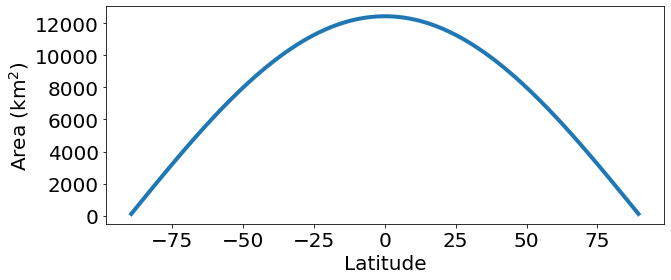

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
#Let's calculate how the surface area changes from the south pole to the north pole
Re = 6371.0 #km
#First let's define the meridians
lambda_c = -120.0
lambda_d = -121.0
#Let's intialize an array of latitudes with a 1 arcdegree resolution
phis = np.linspace(-90,90,180.0)
phi_a = phis[:-1]
phi_b = phis[1:]
#Let's compute the surface area for these cases
area = surface_area(Re,phi_a,phi_b,lambda_c,lambda_d)
#Make a plot
plt.figure(figsize=(10,4))
plt.plot((phi_a+phi_b)/2,area,lw=4)
plt.xlabel('Latitude',fontsize=20)
plt.ylabel(r'Area (km$^2$)',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Map Projections

Sources: Robinson et al., 1995; Snyder, John P. 1987

A map projection is a systematic representation of all or part of the surface of a round body, especially the Earth, on a plane.

<img src="http://2012books.lardbucket.org/books/geographic-information-system-basics/section_06/8c5c63aacfa3743ed4962745a77d782c.jpg" width="400">

## Why do we need map projections?

Having a very high resolution globe in your backyard/living room is not very practical.


<img src="https://upload.wikimedia.org/wikipedia/commons/e/e2/Globe_at_the_Vancouver_Convention_Centre.JPG" width="400">

Plus, its much easier to handle a plane (i.e., 2d array) than the surface of a sphere (or worse an ellipsoid). 

# You can't have your cake and eat it too

* Projecting from the globe to a plane cannot be done without distortion.

* There are an infinite number of map projections. 

* Different map projections have different strengths and weakneeses.

* There is no **one** map projection.

# Common developable surfaces

<img src="Images/Snyder1987_DevelopableSurfaces.png" width="400">

* There are other developable surfaces such as the pseudo-cylindrical one.
* The type of developable surface, the orientation of the surface with respect to the Earth's axis, and how the surface intersects the globe leads to many map projections.


# Tissot's indicatrix deformation map

This map enables a way to visually illustrate the angular and areal distortions in a map projection.

### Unprojected globe

<img src="https://map-projections.net/img/figs/orthographic-tissot-big.jpg" width="600">

### Mercator projection

<img src="https://map-projections.net/img/figs/mercator-tissot-big.jpg" width="600">

Source: map-projections.net


# Characteristics of map projections

The characteristics of a given map projections is what leads to choosing one map projection over another.

# Map projection characteristic: Area

An ***equal area projection*** is a map projection that shows regions that are the same size on the Earth as the same size on the map but may distort the shape, angle, and/or scale.

### Example: Cylindrical equal area projection

* #### Global map 

<img src="https://upload.wikimedia.org/wikipedia/commons/7/76/Cylindrical_equal-area_projection_SW.jpg" width="700">

* #### Tissot's Indicatrix of deformation

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Tissot_indicatrix_world_map_Lambert_cyl_equal-area_proj.svg/2880px-Tissot_indicatrix_world_map_Lambert_cyl_equal-area_proj.svg.png" width="700">


# Map projection characteristic: Shape

A ***conformal projection*** aims to ensure that the relative local angles around every point on the map are shown correctly. Although a large area must still be shown distorted in shape, its small features are shaped generally correct.

### Example: Mercator projection

* #### Global map 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/73/Mercator_projection_Square.JPG/700px-Mercator_projection_Square.JPG" width="700">

* #### Tissot's Indicatrix of deformation

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Mercator_with_Tissot%27s_Indicatrices_of_Distortion.svg/700px-Mercator_with_Tissot%27s_Indicatrices_of_Distortion.svg.png" width="700">

# Map projection characteristic: Scale

No map projections shows scale correctly throughtout the map. However, ***an equidistant projection*** shows true scale between one or two points and every other point on the map, or along every meridian. 

### Example: Equidistant conic projection

* #### Global map 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Equidistant_conic_projection_SW.JPG/500px-Equidistant_conic_projection_SW.JPG" width="700">

* #### Tissot's Indicatrix of deformation

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/Equidistant_Conic_with_Tissot%27s_Indicatrices_of_Distortion.svg/2560px-Equidistant_Conic_with_Tissot%27s_Indicatrices_of_Distortion.svg.png" width="700">

# Map projection characteristic: Direction 

An ***azimuthal projection*** ensures that directions or azimuths of all points on the map are shown correctly with respect to the center.

### Example: Azimuthal equidistant projection

* #### Global map 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Azimuthal_equidistant_projection_SW.jpg/1280px-Azimuthal_equidistant_projection_SW.jpg" width="700">

* #### Tissot's Indicatrix of deformation

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Azimuthal_Equidistant_with_Tissot%27s_Indicatrices_of_Distortion.svg/600px-Azimuthal_Equidistant_with_Tissot%27s_Indicatrices_of_Distortion.svg.png" width="700">

# So why don't we just find a projection that meets all these criteria?

It is possible to find projections that combine multiple characteristics. However, a map projection can never be both equal-area and conformal at the same time. You can find a "sweet-spot" but both conditions will never be perfectly met at the same time. 

In the end, a map projection is defined by a suite of functions that map the latitude and longitude values in geographic coordinates to the intended projection. Consequently there is also an inverse function to return to geographic coordinates. We can then go to another projection from there. 

<img src="Images/Clarke1995_Mapping.png" width="400">

Important: When mapping raster data (i.e., gridded spatial data) it is generally the case that we hit a "one to many" and "many to one" problem that makes it impossible to go error free back and forth between map projections. 

# Under the hood: Examples of the forward and backward transformations

# Mercator projection (Sphere assumption)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/73/Mercator_projection_Square.JPG/700px-Mercator_projection_Square.JPG" width="700">

### Forward transformation

$$x = R_e(\lambda - \lambda_0)$$
$$y = \left(R_e/2\right)\ln \left(\frac{1 + \sin \phi}{1 - \sin \phi}\right) $$

### Backward transformation

$$\phi = \pi/2 - 2 \arctan(e^{-y/R_e})$$
$$\lambda = x/R_e + \lambda_0$$

Where $R_e$ is the radius of Earth, $\phi$ is latitude, $\lambda$ is longitude, $x$ is the horizontal coordinate in the map projection, $y$ is the vertical coordinate in the map projection, and $\lambda_0$ is the central meridian (i.e., longitude) of the projection.

**Important**: These functions are only applicable when assuming that the Earth is a perfect sphere. Other more complicated transformations are necessary for the ellipsoid. 

# Cylindrical equal area projection (Sphere assumption)

<img src="https://upload.wikimedia.org/wikipedia/commons/7/76/Cylindrical_equal-area_projection_SW.jpg" width="700">

### Forward transformation

$$x = R_e(\lambda - \lambda_0)\cos \phi_s$$
$$y = R_e\frac{\sin\phi}{\cos\phi_s}$$

### Backward transformation

$$\phi = \arcsin\left[\frac{y \cos\phi_s}{R_e}\right]$$
$$\lambda = \frac{x}{R_e \cos \phi_s} + \lambda_0$$

Where $R_e$ is the radius of Earth, $\phi$ is latitude, $\lambda$ is longitude, $x$ is the horizontal coordinate in the map projection, $y$ is the vertical coordinate in the map projection, $\lambda_0$ is the central meridian (i.e., longitude) of the projection, and $\phi_s$ is the standard parallel.

# Albers equal-area conic projection (Sphere assumption)

<img src="https://upload.wikimedia.org/wikipedia/commons/1/1f/Albers_projection_SW.jpg" width="700">

### Forward transformation

$$n = (\sin \phi_1 + \sin \phi_2)/2$$
$$C = \cos^2 \phi_1 + 2n \sin\phi_1$$
$$\rho = \frac{R_e}{n}\sqrt{C - 2n \sin \phi}$$
$$\rho_0 = \frac{R_e}{n}\sqrt{C - 2n \sin \phi_0}$$
$$\theta = n(\lambda - \lambda_0)$$
$$x = \rho \sin \theta$$
$$y = \rho_0-\rho \cos \theta$$

### Backward transformation

$$\rho = \sqrt{x^2 + (\rho_0 - y)^2}$$
$$\theta = \arctan \frac{x}{\rho_0 -y}$$
$$\phi = \arcsin \frac{C - \left(\frac{\rho n}{R_e}\right)^2}{2n}$$
$$\theta = \arctan \frac{x}{\rho_0 - y}$$

Where $R_e$ is the radius of Earth, $\phi$ is latitude, $\lambda$ is longitude, $x$ is the horizontal coordinate in the map projection, $y$ is the vertical coordinate in the map projection, $\lambda_0$ is the central meridian (i.e., longitude) of the projection, and $\phi_1$ and $\phi_2$ are the standard parallels.

Fortunately for us, there is a lot of software out there that reprojects for us. 

* Cartopy allows us to just reproject on the fly while making a projection
* GDAL is a large library that allows us to reproject, regrid, cut... (we will cover it on Thursday)
* QGIS
* And yes, ArcGIS
* ...

# Let's go back to Cartopy's projections

In [ ]:
%%HTML
<iframe width="939" height="528" src="https://scitools.org.uk/cartopy/docs/latest/crs/projections.html" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Example: Robinson's projection

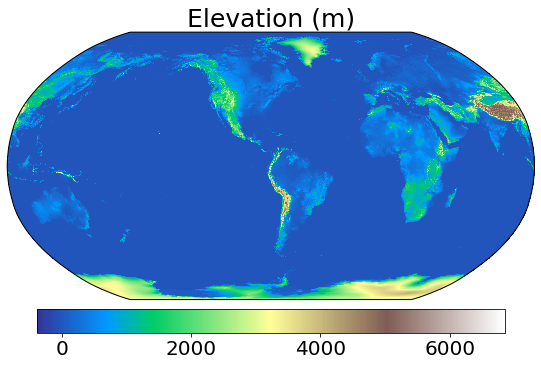

In [9]:
img_extent = (-180,180,-90,90)
fig = plt.figure(figsize=(14,6))
#Define a new target projection
central_longitude = -180
#Target projection
ax = plt.axes(projection=cartopy.crs.Robinson(central_longitude=-78))
#Source projection
plt.imshow(dem,transform=cartopy.crs.PlateCarree(),cmap=plt.get_cmap('terrain'),extent=(img_extent))
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(ax=ax,orientation='horizontal',shrink=0.6,pad=0.03)
cb.ax.tick_params(labelsize=20)
plt.title('Elevation (m)',fontsize=25)
plt.show()

# Map projections are fun! (Really, they actually are...)

There is **a lot** more that you can learn about projections. I put the pdf of "Map Projections - A Working Manual" in the "Other" directory in the GitHub repository. Feel free to read through it if you want to learn more.